# Computational Social Science Project #2 

**Enter your Name:** Namita Karnik

*Semester:* Fall 2023


Below we fill in some of the code you might use to answer some of the questions. Here are some additional resources for when you get stuck:
* Code and documentation provided in the course notebooks  
* [Markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) to help with formatting the Jupyter notebook
* Try Googling any errors you get and consult Stack Overflow, etc. Someone has probably had your question before!
* Send me a pull request on GitHub flagging the syntax that's tripping you up 

**INSTRUCTIONS:** For this project, copy all of the files in the Project 2 folder in the course repo into a "Project 2" subfolder within the "Computational Social Science Projects" directory that you created for the first project. You will work on the project locally, push your project to GitHub, and submit a link to the GitHub repo on bCourses by the project deadline. Be sure the final submission is in the main branch, which is what I'll pull down and re-run to grade. 

## 1. Introduction/Setup

#### a) Import relevant libraries
Here are some libraries you will need to get started. Along the way you may need to add more. Best practice is to add them here at the top of the script.

In [1]:
#
# import libraries you might need here 
#-----------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# use random seed for consistent results 
np.random.seed(273)

#### b) Read in and inspect data frame 
Read in the data frame and look at some of its attributes. Read in the data contained in the projoect folder: "Diabetes with Population Info by County 2017.csv".

In [2]:
#
# read in and inspect data frame
#-----------
# Note that "CountyFips" needs to be a string so the leading 0 isn't dropped (only if you want to make choropleth map) 
diabetes = pd.read_csv('Diabetes with Population Info by County 2017.csv', 
                       dtype={"CountyFIPS": str}) 

In [3]:
#
# look at shape
#-----------
# look at the dimensions of the diabetes data frame
print('shape: ', diabetes.shape) 

shape:  (3220, 95)


In [4]:
#
# set pandas parameters
#-----------
# tells pandas how many rows to display when printing so results don't get truncated
pd.set_option('display.max_rows', 100)

# look at the data types for each column in diabetes df (likely be located under each row bc column names are long)
print('data types:', diabetes.dtypes)

data types: County                                                                                                                                                   object
State                                                                                                                                                    object
CountyFIPS                                                                                                                                               object
Diabetes_Number                                                                                                                                          object
Obesity_Number                                                                                                                                           object
Physical_Inactivity_Number                                                                                                                               object
sex and age_total population

Immediately, we see that some of the features that should be numeric (e.g., Diabetes_Number, Obesity_Number,  and Physical_Inactivity_Number) are not. We can check to see what the non-numeric values are in a column where we are expecting numeric information with a combination of `str.isnumeric()` and `unique()`.

In [5]:
#
# identify non-numeric features
#-----------
# Return rows where the column "Diabetes_Number" is non-numeric and get the unique values of these rows
# the "~" below in front of diabetes negates the str.isnumeric() so it only takes non-numeric values
print(diabetes[~diabetes["Diabetes_Number"].str.isnumeric()]["Diabetes_Number"].unique()) 

['Suppressed']


In [6]:
#
# Now do the same as above, but for "Obesity_Number"
#-----------
print(diabetes[~diabetes["Obesity_Number"].str.isnumeric()]["Obesity_Number"].unique()) 

['No Data']


In [235]:
#
# Now do the same as above, but for "Physical_Inactivity_Number" 
#-----------
print(diabetes[~diabetes["Physical_Inactivity_Number"].str.isnumeric()]["Physical_Inactivity_Number"].unique()) 

['No Data']


These values ("Suppresssed" and "No Data") contained in the two respective columns are coercing these features to objects instead of them being  integers. Let's drop those rows in the next section, and also recode "Physical_Inactivity_Number" feature to be an integer.

#### c. Recode variables

Convert 'Diabetes_Number', 'Obesity_Number', and 'Physical_Inactivity_Number' to integers below so we can use them in our analysis. Also fill in the object type we want to recode 'sex and age_total population_65 years and over_sex ratio (males per 100 females)' too (you'll have to scroll all the way over to the right).

In [236]:
#
# Recode variables
#-----------

# Diabetes
# ----------
# keep only useful info about our target feature, i.e., where diabetes_number not = 'Suppressed'
# note that the inside reference to the diabetes df identifies the column, and the outer calls specific rows according to a condition 
diabetes = diabetes[diabetes['Diabetes_Number']!="Suppressed"] 
diabetes = diabetes[diabetes['Obesity_Number']!="No Data"] 
diabetes = diabetes[diabetes['Physical_Inactivity_Number']!="No Data"] 


# use the astype method on Diabetes_Number to convert it to an integer...if you are not sure, what does the astype() documentation tell you are possible arguments? 
diabetes['Diabetes_Number'] = diabetes['Diabetes_Number'].astype("int")

# Obesity
# ----------
diabetes['Obesity_Number'] = diabetes['Obesity_Number'].astype("int")

# Physical Inactivity
# ----------
diabetes['Physical_Inactivity_Number'] = diabetes['Physical_Inactivity_Number'].astype("int")

# Some final changes 
# ----------
# 65+ sex ratio had one "-" in it so let's drop that row first
diabetes = diabetes[diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)']!= "-"]

# change to numeric from string, since it originally included the "-", which made it a string
# you'll have to decide whether to make it integer or float 
diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'] = diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'].astype(float)
diabetes.head()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_1,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some o

We should probably scale our count variables to be proportional to county population. We create the list 'rc_cols' to select all the features we want to rescale, and then use the `.div()` method to avoid typing out every single column we want to recode. 

In [237]:
#
# Scale to county populations
#-----------

# select count variables to recode to percentages; make sure we leave out ratios and our population variable 
# because these don't make sense to scale by population
rc_cols = [col for col in diabetes.columns if col not in ['County', 'State', 'CountyFIPS', 
                                                        'sex and age_total population_65 years and over_sex ratio (males per 100 females)', 
                                                        'sex and age_total population_sex ratio (males per 100 females)', 
                                                        'sex and age_total population_18 years and over_sex ratio (males per 100 females)',  
                                                        'race_total population']]

# recode all selected columns to numeric
diabetes[rc_cols] = diabetes[rc_cols].apply(pd.to_numeric, errors='coerce')

# divide all columns but those listed above by total population to calculate rates
diabetes[rc_cols] = diabetes[rc_cols].div(diabetes['race_total population'], axis=0)
diabetes.head()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_1,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some o

Let's check our work. Are all rates bounded by 0 and 1 as expected? 

In [238]:
#
# check
#-----------
# set pandas options
pd.set_option('display.max_columns', None)

# inspect recoded values
diabetes_summary = diabetes.describe().transpose() # note we use the transpose method rather than .T because this object is not a numpy array
  
# check recoding 
with pd.option_context('display.max_rows', 100, 'display.max_columns', None): 
    display(diabetes_summary.iloc[ : ,[3,7]]) # select which columns in the summary table we want to present
    

,min,max
Diabetes_Number,0.019038,2.242079e-01
Obesity_Number,0.088946,4.767883e-01
Physical_Inactivity_Number,0.064949,3.922853e-01
sex and age_total population_65 years and over_sex ratio (males per 100 females),34.700000,2.200000e+02
race_total population,228.000000,1.009805e+07
race_total population_one race,0.713126,1.000000e+00
race_total population_two or more races,0.000000,2.868743e-01
race_total population_one race_1,0.713126,1.000000e+00
race_total population_one race_white,0.038912,1.000000e+00
race_total population_one race_black or african american,0.000000,8.741228e-01


#### d. Check for duplicate columns

There are a lot of columns in this data frame. Let's see if there are any are duplicates. Note that Pandas will not allow them to have the same exact column name, so they will likely be distinct on column name but will be copies otherwise.

In [239]:
#
# Check for duplicate columns
#-----------
# I used Google to figure this out, and adapted this example for our purposes:  
# source: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/ 
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

duplicateColumnNames = list(getDuplicateColumns(diabetes))
print('Duplicate Columns are as follows: ')
duplicateColumnNames

Duplicate Columns are as follows: 


['sex and age_total population',
 'sex and age_total population_65 years and over_1',
 'race_total population_two or more races_1',
 'hispanic or latino and race_total population',
 'race_total population_one race_1',
 'sex and age_total population_18 years and over_1']

In [240]:
#
# drop columns from duplicates list
#-----------
# now drop list of duplicate features from our df using the .drop() method
diabetes = diabetes.drop(columns=['hispanic or latino and race_total population',
 'sex and age_total population',
 'sex and age_total population_18 years and over_1',
 'race_total population_one race_1',
 'race_total population_two or more races_1',
 'sex and age_total population_65 years and over_1']) 

In [241]:
duplicateColumnNames = list(getDuplicateColumns(diabetes))
print('Duplicate Columns are as follows: ')
duplicateColumnNames

Duplicate Columns are as follows: 


[]

Finally, there are many states accounted for the in dataset. If we convert this column to a categorical variable, and create dummies, it will create a rather sparse matrix (many 0s in our dataset) becuase there will be 49 dummy variables. One alternative is to classify each state to a larger US region and use that variable instead of state. The following code will do that.

In [242]:
# Define a dictionary mapping states to regions
state_to_region = {
    'Alabama': 'Southeast',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'Northeast',
    'District of Columbia': 'Southeast',
    'Florida': 'Southeast',
    'Georgia': 'Southeast',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'Northeast',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'Southeast',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'Southeast',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'Southeast',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

# Add a new 'Region' column based on the mapping
diabetes['Region'] = diabetes['State'].map(state_to_region)

# Print to verify'Region' column has been added
diabetes

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some

## 2. Exploratory Data Analysis

Make at least two figures (feel free to make more) and explain their relevance to the scientific problem. The goal here is to uncover interesting patterns in the data, learn more about the scope of the problem, and communicate these findings to your audience in clear ways.

In [243]:
diabetes.columns

Index(['County', 'State', 'CountyFIPS', 'Diabetes_Number', 'Obesity_Number',
       'Physical_Inactivity_Number',
       'sex and age_total population_65 years and over_sex ratio (males per 100 females)',
       'race_total population', 'race_total population_one race',
       'race_total population_two or more races',
       'race_total population_one race_white',
       'race_total population_one race_black or african american',
       'race_total population_one race_american indian and alaska native',
       'race_total population_one race_american indian and alaska native_cherokee tribal grouping',
       'race_total population_one race_american indian and alaska native_chippewa tribal grouping',
       'race_total population_one race_american indian and alaska native_navajo tribal grouping',
       'race_total population_one race_american indian and alaska native_sioux tribal grouping',
       'race_total population_one race_asian',
       'race_total population_one race_asian_asi

<Axes: xlabel='Diabetes_Number', ylabel='Obesity_Number'>

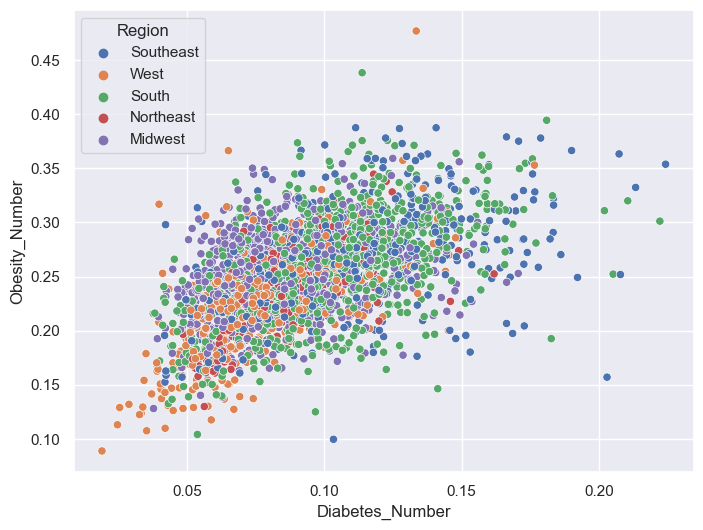

In [245]:
#
plt.figure(figsize=(8, 6))
# EDA #1 and interpretations in this section 
sns.scatterplot(x = "Diabetes_Number",
                y = "Obesity_Number",hue="Region",
                data = diabetes)
#these two are positively correlated 

Ans: Diabetes has been proven to have a strong positive correlation with obesity (1) (2). I ran this check to provide a sense check. Since these have a positive correlation, the slope is positive. I also highlighted the data points by region, to see trends in a specific region, but the graph had too many points to be sure. The western part of the country seems to have less obese counties, and lesser instances of diabetes. The south-eastern and the southern part of the country has more diabeties cases. I continue this line of analysis to examine the regional comparision in diabeties cases. 


(1)Golay, A., & Ybarra, J. (2005). Link between obesity and type 2 diabetes. Best practice & research. Clinical endocrinology & metabolism, 19(4), 649–663. https://doi.org/10.1016/j.beem.2005.07.010

(2) Al-Sumaih, Ibrahim, Brian Johnston, Michael Donnelly, and Ciaran O’Neill. 2020. “The Relationship between Obesity, Diabetes, Hypertension and Vitamin D Deficiency among Saudi Arabians Aged 15 and over: Results from the Saudi Health Interview Survey.” BMC Endocrine Disorders 20(1): 81.

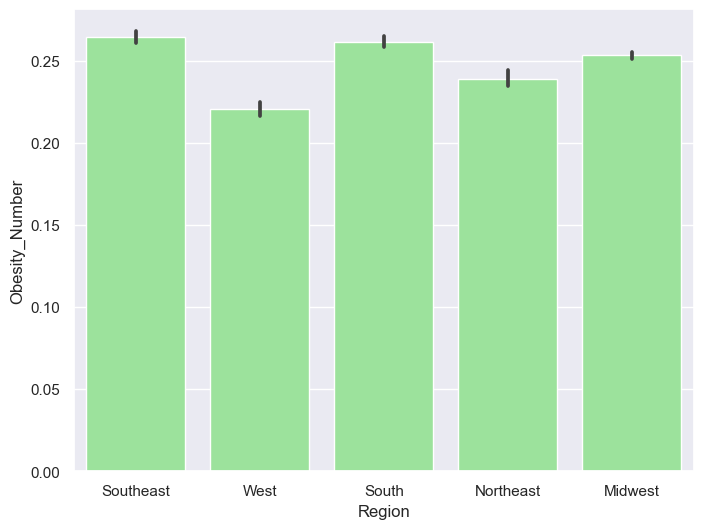

In [247]:
#
# EDA #2 and interpretations in this section 
#-----------
plt.figure(figsize=(8, 6))
sns.barplot(x = "Region", 
            y = "Obesity_Number", 
            data = diabetes, 
            color = "lightgreen");

Ans: Continuing with my previous line of analysis, I am showing here how some regions have a lesser burden of diabeties than other regions. This could also be because of a change in the number of counties/states in each region. However, in accordance with my last point, the western region seems to have lesser cases of diabetes numbers, as compared to the south and south-eastern region. 

## 3. Prepare to Fit Models

### 3.1 Finalize Data Set

We've already cleaned up the data, but we can make a few more adjustments before partitioning the data and training models. Let's recode 'Region' to be a categorical variable using `pd.get_dummies` and drop 'State'. Also, we'll drop 'County' because 'CountyFIPS' is already a unique identifier for the county. 

In [170]:
#
# Drop and get dummies
#-----------

# create dummy features out of 'Region', which might be related to diabetes rates 
diabetes_clean = pd.get_dummies(diabetes, 
                               columns = ["Region"],  
                               drop_first = True) # drop the first as a reference 

# drop 'County' and 'State' variables
diabetes_clean = diabetes_clean.drop(labels = ['State', 'County'],
                               axis = 1) # which axis tells python we want to drop columns rather than index rows?
#1 is columns, 0 is rows
# look at first 10 rows of new data frame 
diabetes_clean.head(20) 

,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race -

### 3.2 Partition Data, Feature Selection, and Standardization

Now, we will partition our data to prepare it for the training process. Ultimately we want to use a 60% train—20% validation—20% test in this case. More data in the training set lowers bias, but then increases variance in the validation/test sets. Balancing between bias and variance with choice of these set sizes is important as we want to ensure that there is enough data to train on to get good predictions, but also want to make sure our hold-out sets are representative enough.

Work through partitioning the data into the test/train/validation sets in the chunks below. Be sure to that if you are using Ridge or LASSO, you Standardize the data. Where you do this in the workflow matters so be clear about where you are doing this and why. 

In [171]:
#
# Partition data
#-----------

# import library
from sklearn.model_selection import train_test_split

# create y dataframe 
y = diabetes_clean[["Diabetes_Number"]] #chosen one y variable to regress other data on

# create X dataframe (include everything except "Diabetes_Number", our target, 
# and "race alone or in combination with one or more other races_total population")
X = diabetes_clean.drop(["Diabetes_Number", 
               "race alone or in combination with one or more other races_total population"], # list of variables to drop
               axis= 1)
print(X)

     CountyFIPS  Obesity_Number  Physical_Inactivity_Number  \
0         01001        0.244366                    0.226902   
1         01003        0.233255                    0.192324   
2         01005        0.310643                    0.210651   
3         01007        0.290052                    0.258667   
4         01009        0.246804                    0.249198   
...         ...             ...                         ...   
3215      56037        0.212208                    0.170410   
3216      56039        0.088946                    0.086951   
3217      56041        0.238973                    0.170751   
3218      56043        0.213802                    0.210112   
3219      56045        0.283803                    0.194789   

      sex and age_total population_65 years and over_sex ratio (males per 100 females)  \
0                                                  76.5                                  
1                                                  86.6        

Investigate whether there are any features that you should remove prior to spliting and model fitting. You may also consider using plots and relationships you found in the EDA stage for this question. Be sure to justify your logic. 

<Axes: >

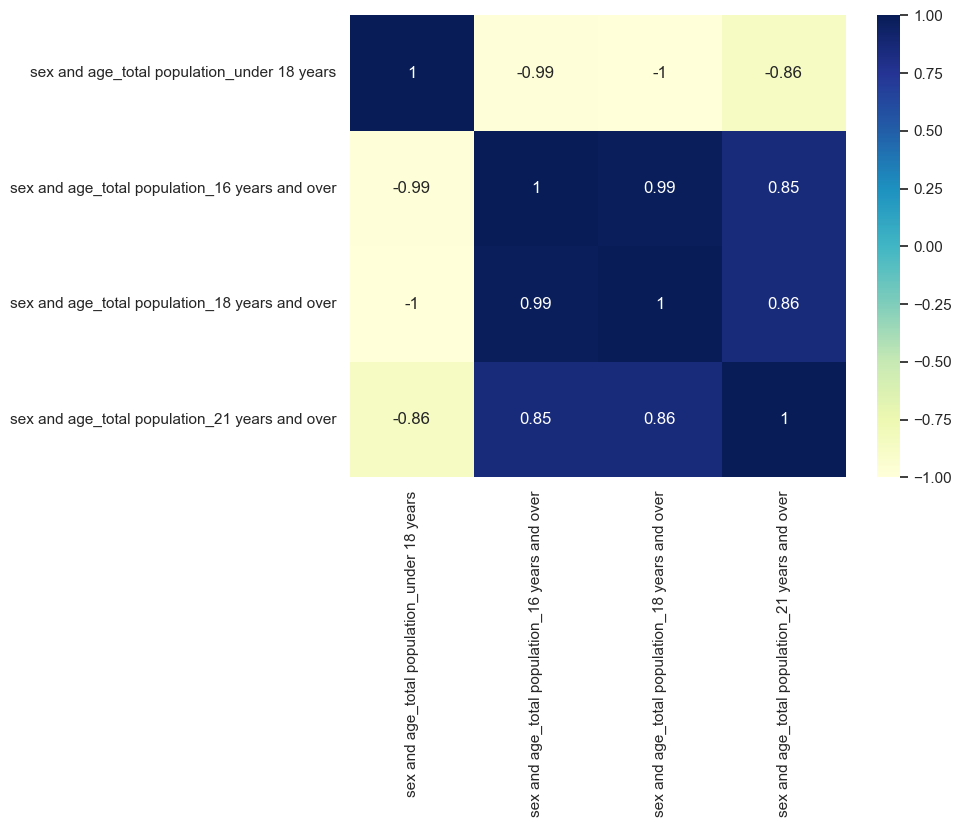

In [248]:
plt.figure(figsize=(8, 6))
sns.heatmap(diabetes[['sex and age_total population_under 18 years',
       'sex and age_total population_16 years and over',
       'sex and age_total population_18 years and over',
       'sex and age_total population_21 years and over']].corr(), cmap="YlGnBu", annot=True)

I am choosing to drop the population 16 years and over, total population under 18 years and total population 21 years and over because these three features are highly correlated to tota population 18 years and over.
#This has been shown in the heatmap I've shown of the correlation between the four. 

In [173]:
#
# Feature selection
#-----------
X = X.drop(['sex and age_total population_under 18 years',
            'sex and age_total population_16 years and over', 
            'sex and age_total population_21 years and over'], 
               axis= 1)

In [174]:
X.shape
diabetes_clean.shape

(3112, 91)

In [175]:
#
# Training/test split
#-----------

# set the random seed
np.random.seed(10)


# split the data so that it returns 4 values: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,                 # specify training dataset
                                                    y,                 # specify test dataset
                                                    train_size=0.8,      # specify proportional split for training
                                                    test_size=0.2)       # specify proportional split for test

In [176]:
#
# Validation split
#-----------

# train_test_split returns 4 values: X_train, X_test, y_train, y_test, so how do we create a 60-20-20 train-validate-test split? 
X_train, X_validate, y_train, y_validate =  train_test_split(X_train, 
                                                            y_train,
                                                            train_size=0.75, 
                                                            test_size=0.25)

Ans: Out of the original data, 20% is for testing, 20% is for validation, and 60% is for training. Training set is the data used to train the model and predict outcomes. Validation set is to evaluate the model and check if we’ve trained correctly. We can fine-tune our model in this process. And the test set is to evaluate the model (and essentially see how well we’ve predicted the outcome). We need to keep the maximum amount of data to train the model, to make sure it is accurate. However, a good practice is to use 60%, so as to not overfit. 


Overfitting is creating a very exact decision boundary around the training data. Because the training data is only a sample of the actual data, the prediction around it must be such that it is a reflection of the entire data set and doesn’t just predict the data it was built on. Because of that, overfitting is an issue. Underfitting, as in, creating a wider decision boundary is also an issue because it is too generic and can’t predict much.

The validation data set helps us understand if our model is accurate and we can tweak the model using this. Finally, the test data set shows how good our model is. This ratio is important to maintain accuracy and prevent overfitting. 

In [177]:
#
# Standardization
#-----------
# Given that we want to only standardize non-dichotomous variables, we need to find a 
# solution that will loop over only the columns we want to standardize. The code below
# identifies all non-dichotomous variables in our dataset and only standardizes those.

# load library and create instance of Standard Scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# identify non-dichotomous columns we want to transform
columns = list(X_test.select_dtypes(include=['number']).loc[:, X_test.nunique() > 2])

# use loop to transform training data for only columns we want to transform
for column in columns:
    X_train[column] = scaler.fit_transform(X_train[column].values.reshape(-1, 1)).flatten()

# use loop to transform validation data for only columns we want to transform
for column in columns:
    X_validate[column] = scaler.fit_transform(X_validate[column].values.reshape(-1, 1)).flatten()

# use loop to transform test data for only columns we want to transform
for column in columns:
    X_test[column] = scaler.fit_transform(X_test[column].values.reshape(-1, 1)).flatten()

Ans: The best time for standardization is after the split of the three sets of data to avoid any information/data lekage from the test data into the training data. If we standardize/normalize it earlier, the information from the larger distribution will be contained in the training data, affecting our model outcomes. 

## 4. Train Models

In this section, train your models. 

**Note that if you use Lasso, you will likely need to specify a very high penalty (very low, like alpha of 0.001) because of convergence problems.**

### 4.1 Describe models

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem.

**MODEL DESCRIPTION(S):** ...

### 4.2 Train models

Train each model in the training set, and be sure to tune hyperparameters if appropriate. Report any relevant summary statistics from the training set, including how well each model fits the training data.

#### Model 1:  OLS

Ans: MODEL DESCRIPTION 
Detail the basic logic and assumptions underlying each model, its pros/cons,and why it is a plausible choice for this problem.

Ordinary Least Square is the most simple model of the three. It assumes that the relationship between the dependent and the independent variable is linear. It can be good at predicting outcomes when the number of observations is much larger than the number of variables. However, if the latter is larger, there will be more variability, which will result in overfitting and poor prediction on test data (which was not used for predictions). Linear regression assumes a linear regression, which might not hold up in the data collected in the real-word. It cannot capture more complex relationships. 

It is a possible choice for this problem because there are multiple linear relationships, like with obesity and diabeties. It is also a good starting point to understand the baseline data, which will then help when we move on to more complex models. 

In [185]:
#
# Model 1 training
#-----------
from sklearn.linear_model import Ridge, Lasso, LinearRegression

lin_reg = LinearRegression()
lin_model = lin_reg.fit(X_train, y_train)

print(lin_model.coef_)
print(lin_model.intercept_)

[[-5.34173248e-08  8.08211632e-03  7.24624582e-03  3.32959572e-03
   3.39520635e-04 -4.92847832e-03  4.92847832e-03 -4.76005288e-02
   4.21183279e-02  1.71118022e-02  1.15449729e-03 -6.80809940e-05
   6.70060037e-04  1.37748266e-03  1.20718106e-02  8.12790299e-03
   1.09366676e-02  1.01954824e-02  6.55384453e-03  3.52180083e-03
   3.84532607e-03  8.04428883e-03 -8.12076674e-04 -8.60530274e-04
   1.74629437e-04 -7.24125685e-04 -4.38569698e-04  2.65955237e-03
  -2.99291008e-03 -8.63219319e-03 -2.33223143e-03 -5.72420657e-04
   5.66427329e-03 -4.09238384e-02 -3.28398915e-02 -3.04108331e-02
  -4.26876440e-03 -1.33048801e-02  3.94973589e-03  4.52941846e-03
  -7.04210353e-04 -7.27345608e-05 -2.62910066e-04 -3.94973589e-03
   1.52766568e-02 -2.12440393e-02  2.50006974e-03 -2.62331759e-02
   4.63855157e-03  1.68886954e-04  2.79723970e-03  1.72505080e-05
   2.81350020e-03 -2.77751899e-04  1.43326387e-03  2.33857706e-03
  -3.34526152e-04  2.52122477e-03 -2.52122477e-03 -5.36992833e-03
  -7.33838

In [186]:
len(lin_model.coef_[0])
len(X.columns)

86

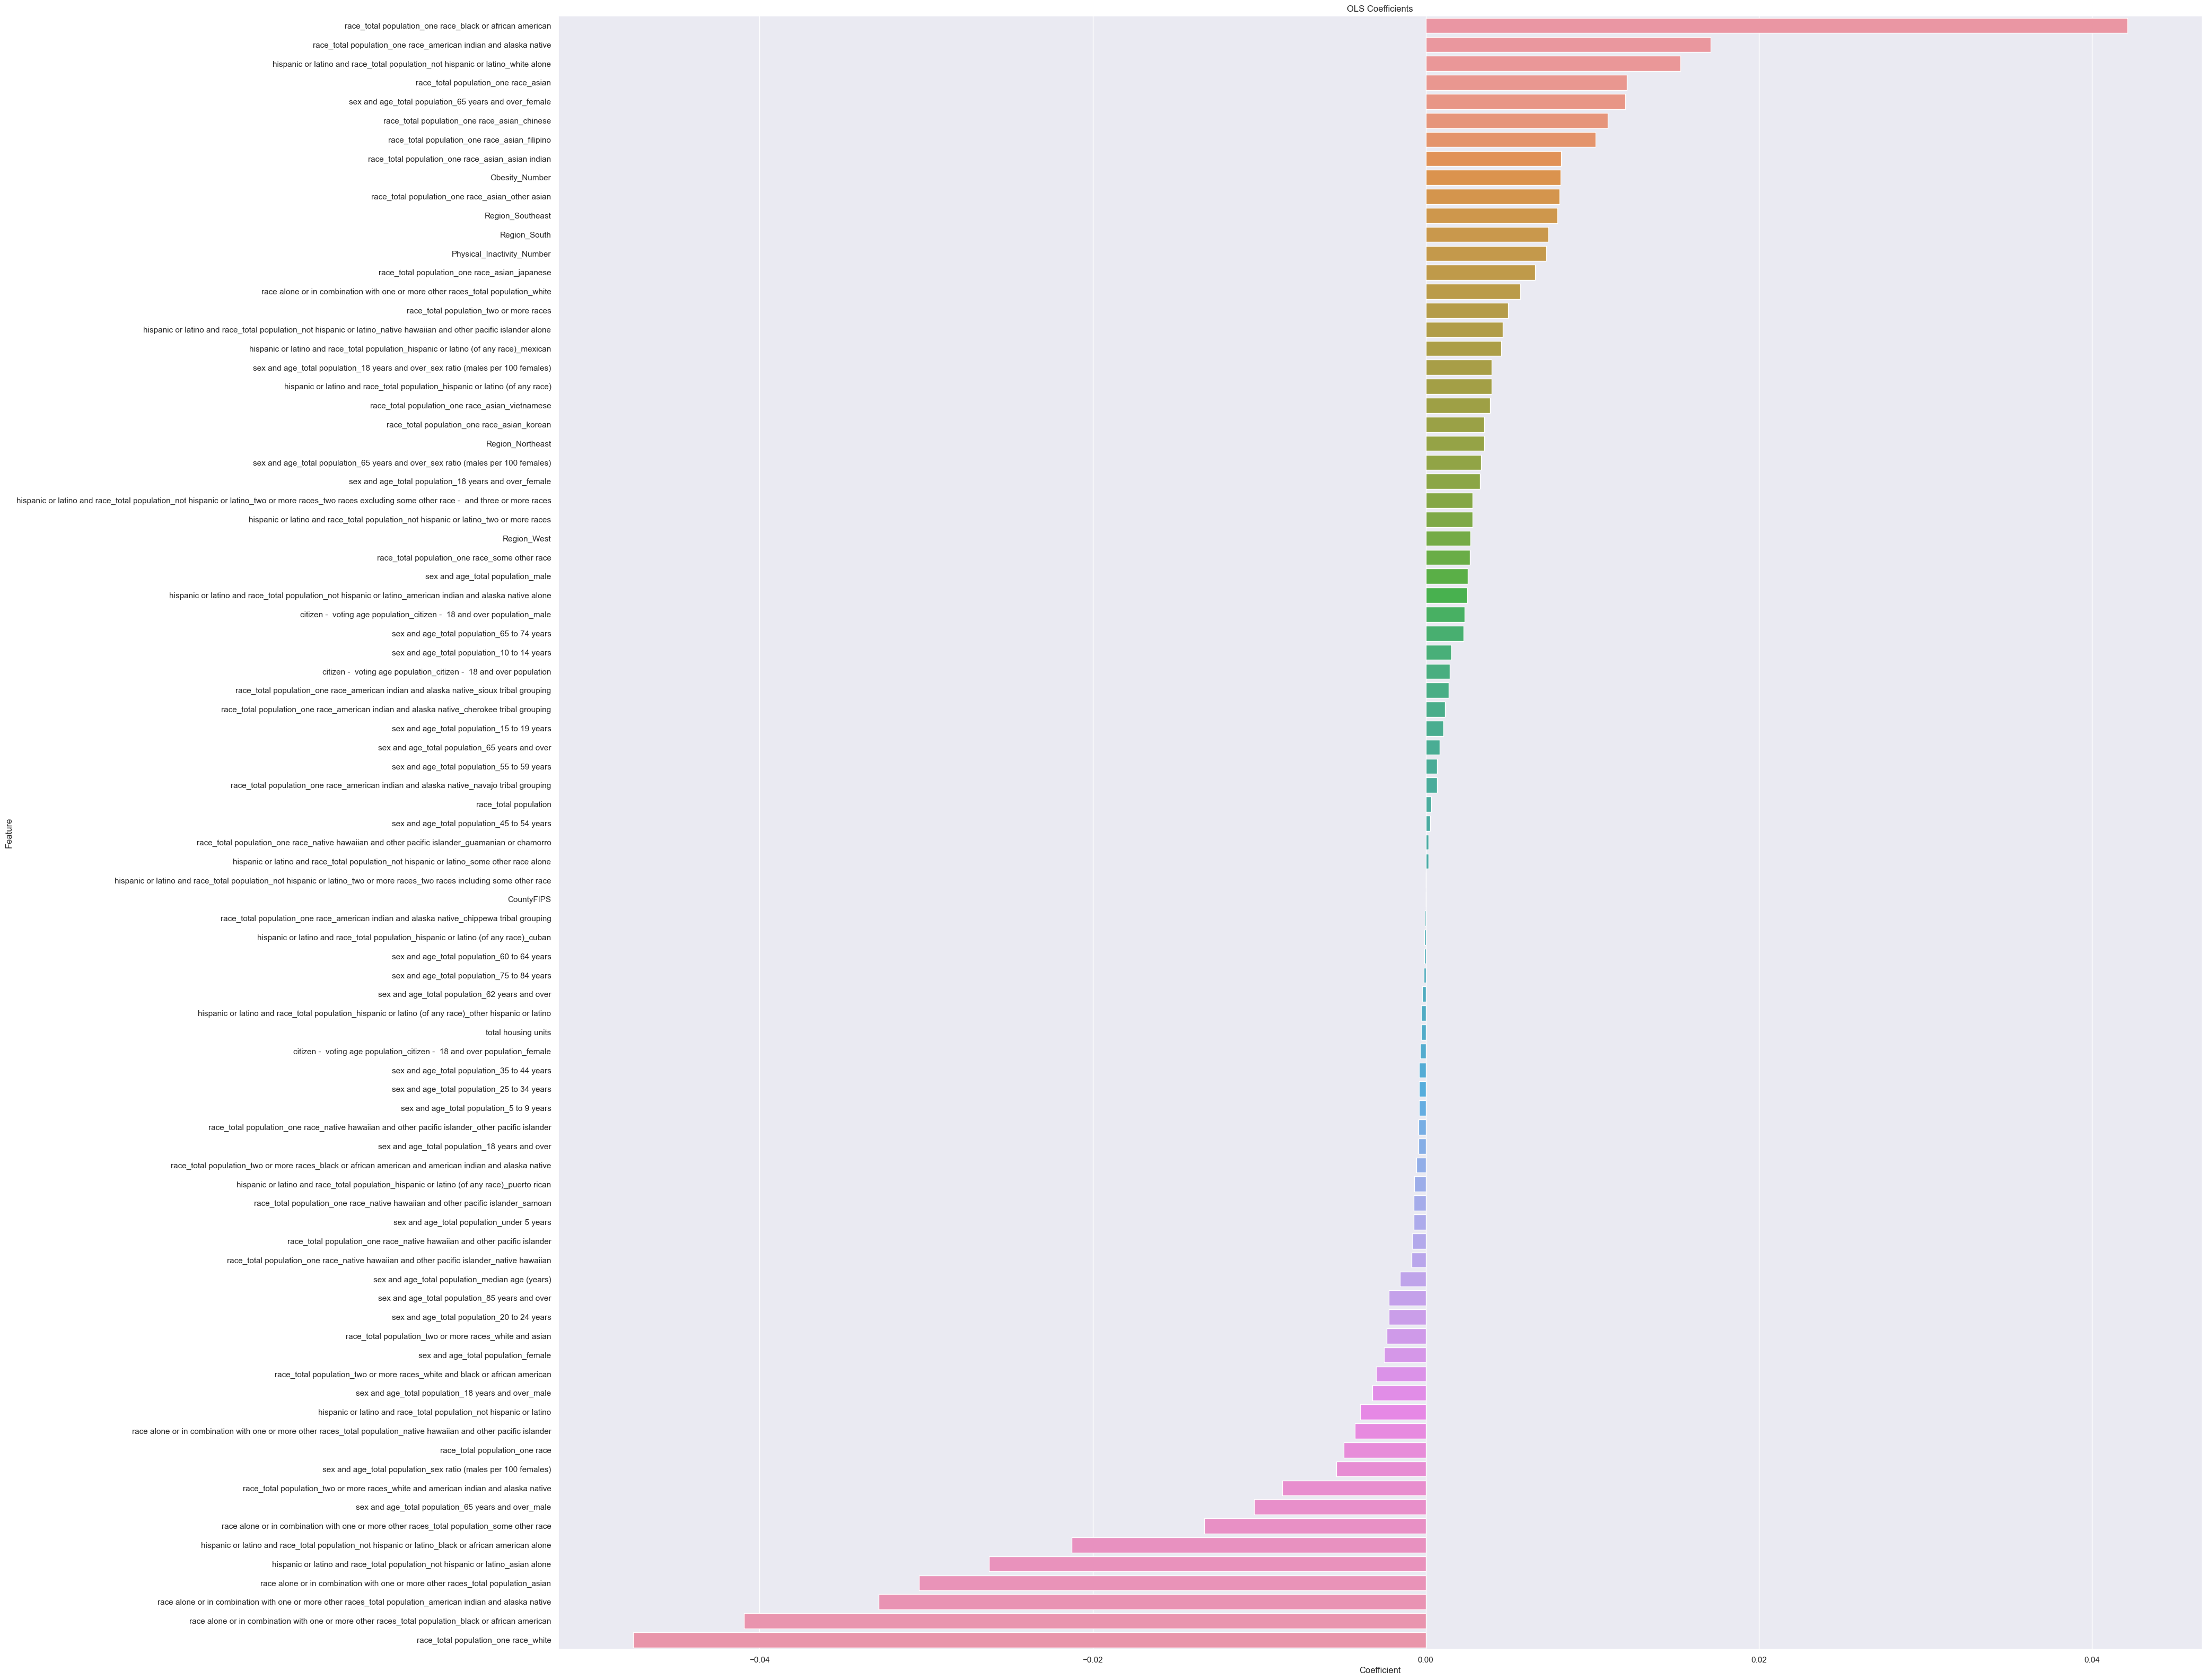

In [250]:
lin_reg_data = pd.DataFrame([lin_model.coef_[0], X.columns]).transpose() 
lin_reg_data.columns = ['Coefficient', 'Feature']           

#plotting it, because why not
sns.set(rc={'figure.figsize':(40,40)})
ax = sns.barplot(x="Coefficient",                           
                 y="Feature",                               
                 data=lin_reg_data,order=lin_reg_data.sort_values('Coefficient',ascending=False).Feature)                         

ax.set_title("OLS Coefficients")                           
plt.show()

#This graphh shows how much or how little each feature influences the diabetes outcome. 

In [273]:
from sklearn.metrics import mean_squared_error

lin_pred = lin_model.predict(X_validate)
print(mean_squared_error(lin_pred,
                         y_validate, 
                         squared = False)) 

#This is my mean square error and we need to minimize it while also not overfitting the data

0.021325096536223977


#### Model 2:  Ridge

Ans: MODEL DESCRIPTION 
Detail the basic logic and assumptions underlying each model, its pros/cons,and why it is a plausible choice for this problem.

Ridge regression is similar to OLS because it retains all the variables. However, it makes the residual sum of squares (RSS) small by shrinking the coefficients close to 0 by introducing a regularization term. It also assumes linearity and independent erros (like OLS), however, it is better at withstanding when the data not indeed linear. 

Its pros are that reduces overfitting of data (unline OLS),  is better at handling multicollinearity and it retains all coefficients. On the flip side, has more bias (because of the regularization term) and it selects all features (which might not always be good when there are too many features). It is quite useful for this dataset, because by reducing some coefficients closer to 0, we will be able to better analyse the effects of the coefficients that do have an effect. Something like age of population above 60 and age of population above 80, might have overlaps, but ridge will be able to look beyond that in its prediction. 

In [265]:
#
# Model 2 training
#-----------

ridge_reg = Ridge()                                              
ridge_model = ridge_reg.fit(X_train, y_train)                    

ridge_reg_data = pd.DataFrame([ridge_model.coef_[0], X.columns]).T  
ridge_reg_data.columns = ['Coefficient', 'Feature']              

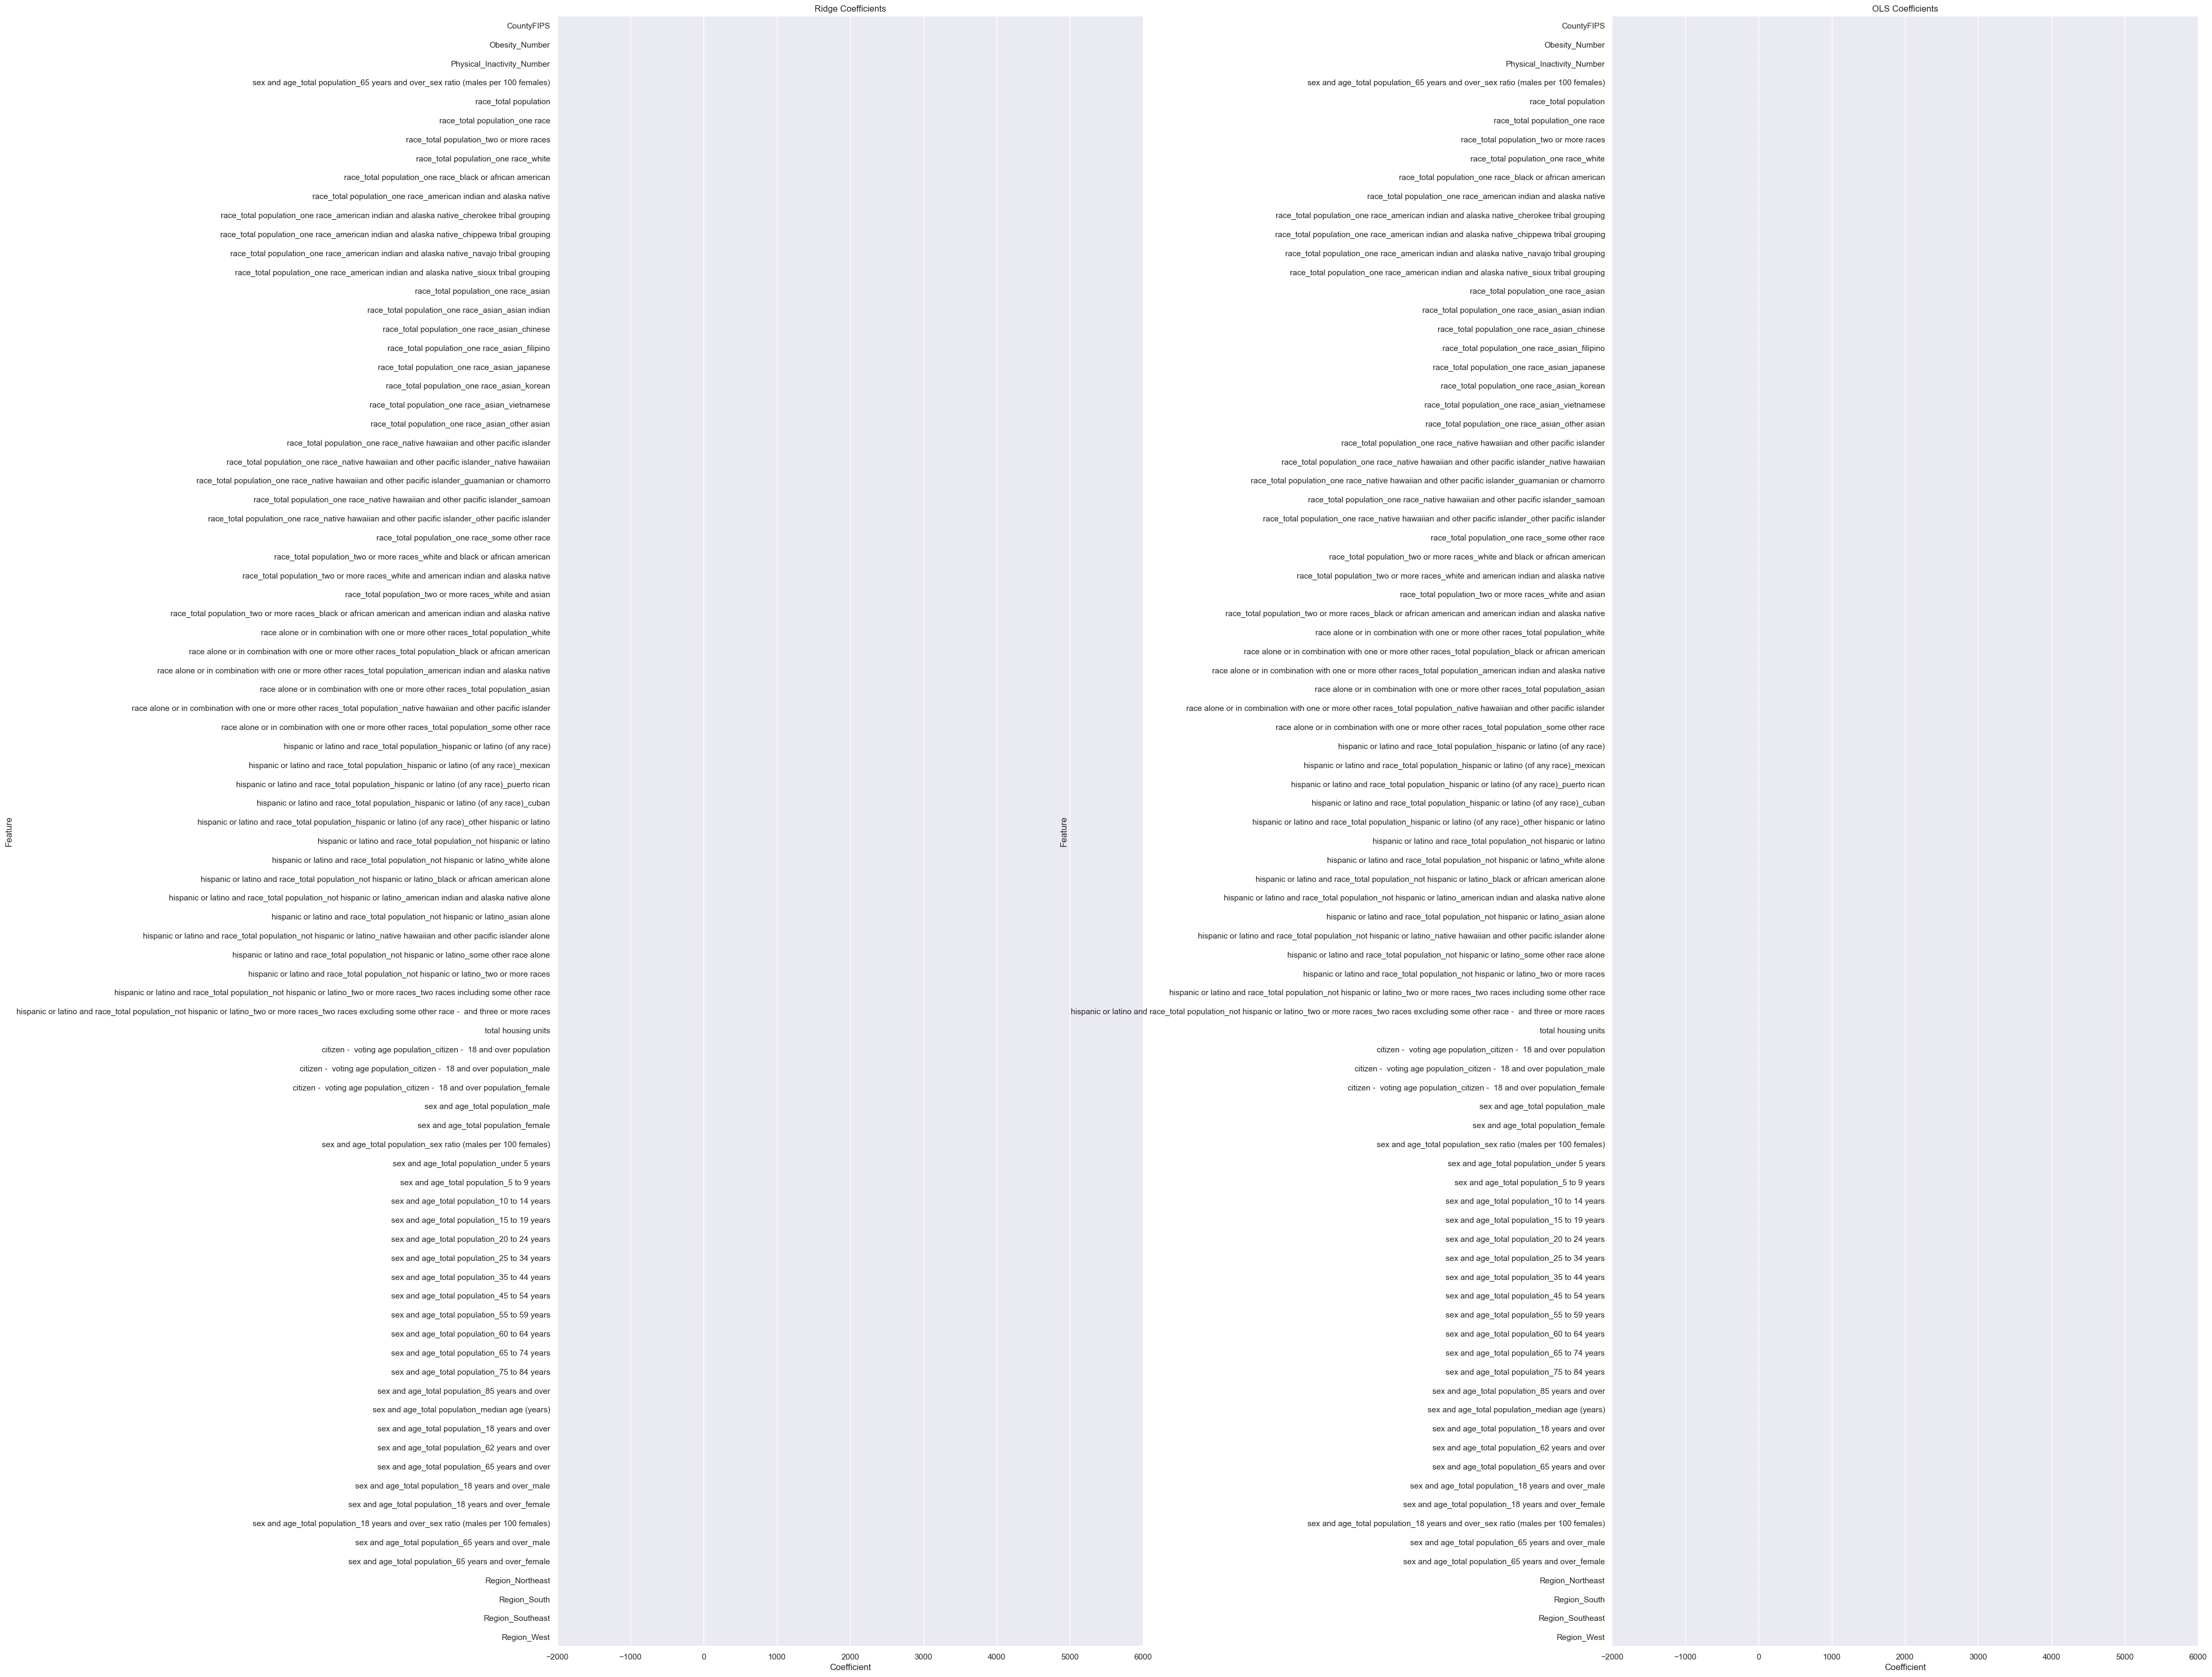

In [267]:
figure = plt.figure()                           
figure.subplots_adjust(wspace = .8, hspace=.5)   

# platting it, because why not

figure.add_subplot(1,   
                   2,   
                   1)  

sns.barplot(x="Coefficient", 
            y="Feature", 
            data=ridge_reg_data).set_title("Ridge Coefficients")

plt.xlim(-2000,6000)

figure.add_subplot(1,   
                   2,   
                   2)  
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=lin_reg_data).set_title("OLS Coefficients")

plt.xlim(-2000,6000)

plt.show()

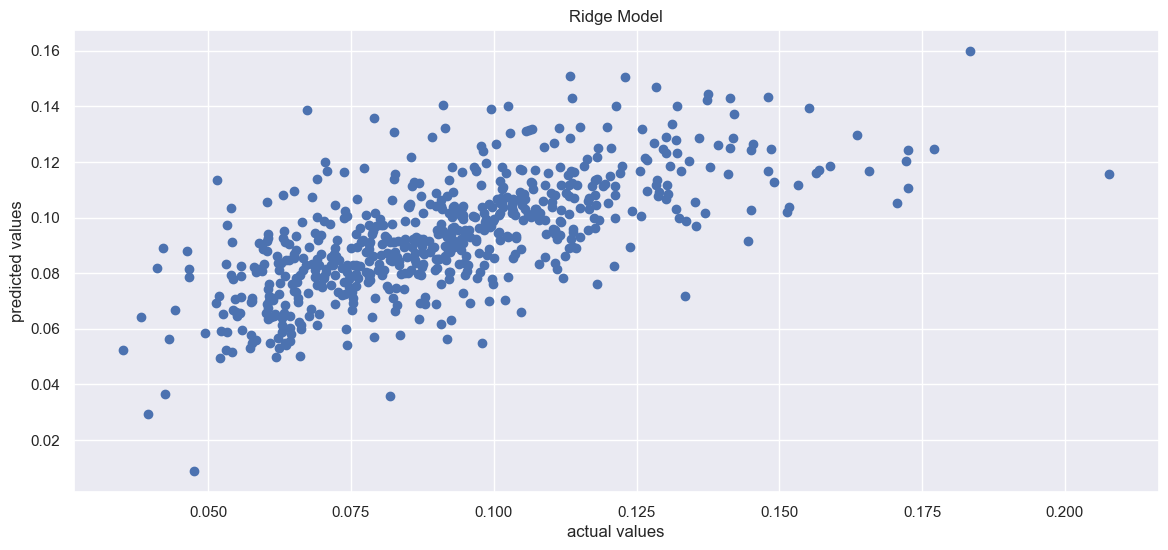

In [260]:
ridge_pred = ridge_model.predict(X_validate)

plt.figure(figsize=(14, 6))
plt.scatter(y_validate, ridge_pred)
plt.title('Ridge Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [192]:
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))

rmse(ridge_pred, y_validate)

/Users/namitakarnik/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Diabetes_Number    0.019623
dtype: float64

#### Model 3: Lasso

Ans: MODEL DESCRIPTION 

The Lasso model minimizes the number of coefficients by shrinking them to 0 (compared to ridge, which only makes them closer to 0). Lasso thus yields a more sparse model, by only having a smaller subset of variables. In terms of cons, like ridge, in Lasso, there is a trade-off between bias and variance. And some important features might get overlooked because they have small coefficients.

Lasso is pretty helpfil because it simplifies models and selects only a limited number of features, which prevents underfitting. It is a possible choice for this model, because we have many features. If we only included ones with larger coefficients, we could have a much simpler model, compared to ridge and OLS. 

In [198]:
#
# Model 3 training
#-----------

lasso_reg = Lasso(max_iter=20000)  
lasso_model = lasso_reg.fit(X_train, 
                            y_train)

lasso_reg_data = pd.DataFrame([lasso_model.coef_, X.columns]).T  
lasso_reg_data.columns = ['Coefficient', 'Feature']     


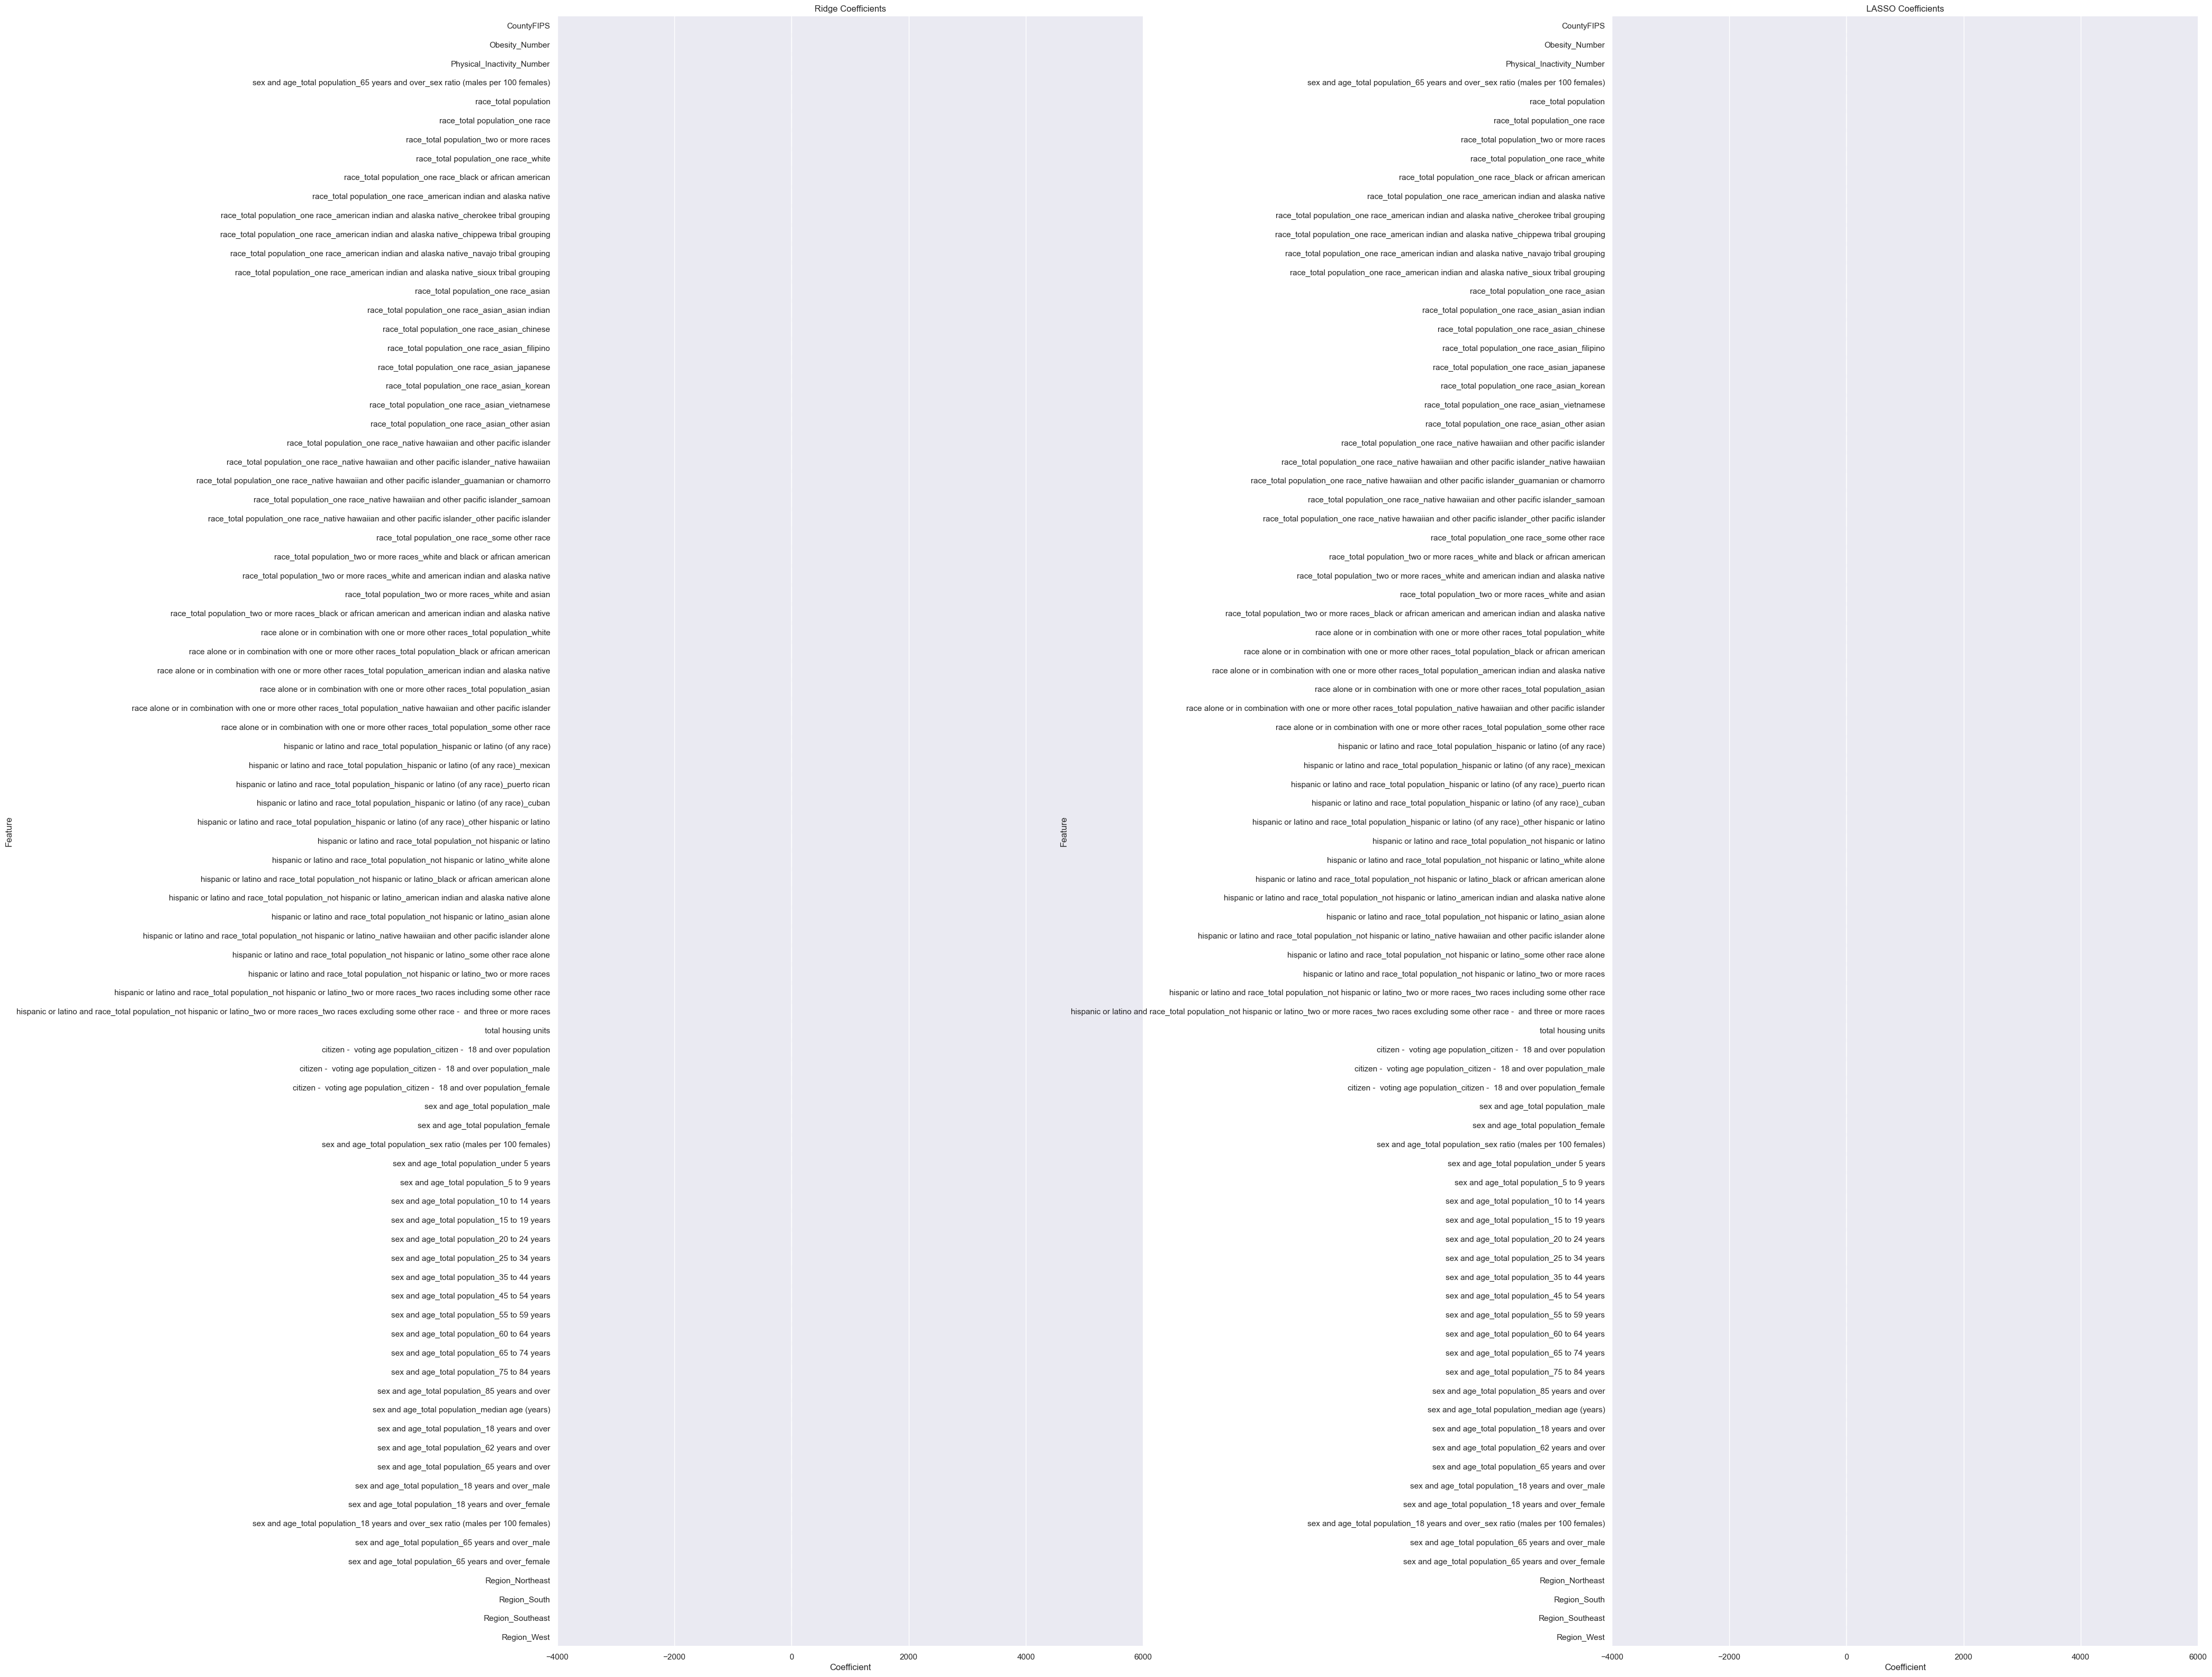

In [199]:
figure = plt.figure()                            
figure.subplots_adjust(wspace = .8, hspace=.5)   

figure.add_subplot(1,   
                   2,  
                   1)   

sns.barplot(x="Coefficient", 
            y="Feature", 
            data=ridge_reg_data).set_title("Ridge Coefficients")


plt.xlim(-4000,6000)

# ----------
figure.add_subplot(1,   
                   2,   
                   2)   

sns.barplot(x="Coefficient", 
            y="Feature", 
            data=lasso_reg_data).set_title("LASSO Coefficients")

plt.xlim(-4000,6000)

plt.show()

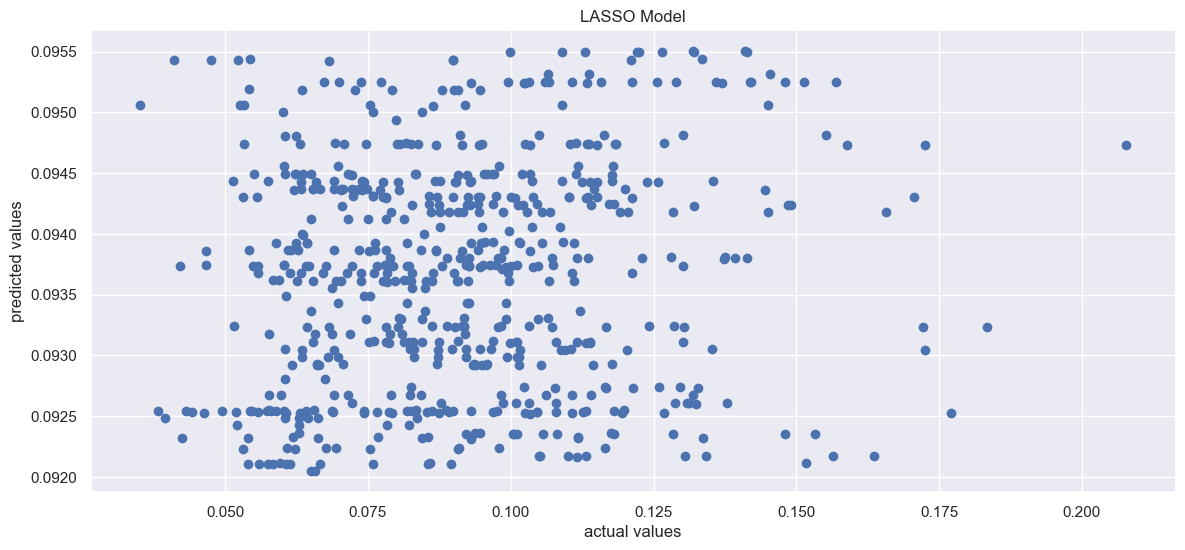

In [268]:
lasso_pred = lasso_model.predict(X_validate)
plt.figure(figsize=(14, 6))

plt.scatter(y_validate, lasso_pred)

plt.title('LASSO Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [201]:
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))

In [202]:
rmse(lasso_pred.reshape(623,1), y_validate)

/Users/namitakarnik/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Diabetes_Number    0.026014
dtype: float64

In [203]:
lasso_pred.reshape(623,1)

array([[0.09310669],
       [0.09412124],
       [0.09393326],
       [0.09248632],
       [0.09252628],
       [0.09481059],
       [0.0924872 ],
       [0.09304964],
       [0.09506416],
       [0.09417879],
       [0.09430771],
       [0.09323574],
       [0.09223652],
       [0.09525114],
       [0.09380747],
       [0.09542951],
       [0.09418356],
       [0.09210584],
       [0.0925484 ],
       [0.09423873],
       [0.09304512],
       [0.09254362],
       [0.09304914],
       [0.09235828],
       [0.09550283],
       [0.09380194],
       [0.09260519],
       [0.09253068],
       [0.09217356],
       [0.09323913],
       [0.09323863],
       [0.09298819],
       [0.09298681],
       [0.09267594],
       [0.09368207],
       [0.09317329],
       [0.09267569],
       [0.09443513],
       [0.09380245],
       [0.09292599],
       [0.09424639],
       [0.09374037],
       [0.09424162],
       [0.09368131],
       [0.09524775],
       [0.094434  ],
       [0.09252917],
       [0.095

## 5. Validate and Refine Models

### 5.1 Predict on the validation set
Using each of the models you trained, predict outcomes in the validation set. Evaluate how well each model did.

In [274]:
#
# Predict on validation data
#-----------
#I validated earlier, but validating again here!

lin_pred = lin_model.predict(X_validate)
print(mean_squared_error(lin_pred,
                         y_validate, 
                         squared = False))


0.021325096536223977


In [278]:
rmse(ridge_pred, y_validate)

/Users/namitakarnik/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Diabetes_Number    0.019623
dtype: float64

In [271]:
rmse(lasso_pred.reshape(623,1), y_validate)

/Users/namitakarnik/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Diabetes_Number    0.026014
dtype: float64

### 5.2 Predict on the test set

Now, choose your best performing model of the three, select out unimportant feature(s), retrain the model, and then predict on the test set. 

Ans: I'm choosing ridge model because that's the one that gives me the smallest rmse (error). 

In [297]:
#
# Predict using your best model

best_pred = ridge_grid_reg.best_estimator_.predict(X_test)

print('Best CV R^2:', max(ridge_grid_reg.cv_results_["mean_test_score"]))
print('Test R^2:', ridge_grid_reg.score(X_test, y_test))
print('Test RMSE', rmse(best_pred, y_test))

Best CV R^2: 0.4833242962241342
Test R^2: 0.4297844427533797
Test RMSE Diabetes_Number    0.020812
dtype: float64


/Users/namitakarnik/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Question: I'm not sure if I'm supposed to retrain the model with the train + validation set, and then test it on my test data. 

Ans: Cross validation R^2 measures how well the model fits the data based on cross validation. It is 0.483, which menas that the model can measure 48.3% of the variance in the dependent variable. 

The test R^2 is how well the model can fit new data, it is slightly lower at 0.43. 

### 5.3 Impement a cross-validation approach

Finally, implement a cross-validation approach for your best model and evaluate the results.

In [299]:
ridge_reg.get_params()

{'alpha': 0.3,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [303]:
#
# Run cross-validation on RIDGE
#-----------

# Running 9*2*4 = 72 tests, each with 3-fold cross validation

param_grid = {'alpha': np.arange(.1, 1, .1),
              'fit_intercept': [True, False],
              'solver': ['auto', 'svd', 'cholesky', 'lsqr']}

ridge_grid_reg = GridSearchCV(ridge_reg,  
                              param_grid, 
                              cv=3)       #cv here is 3. I've tested it with both 10 and 3. 

ridge_grid_reg.fit(X_train, y_train)

best_index = np.argmax(ridge_grid_reg.cv_results_["mean_test_score"])  
best_ridge_pred = ridge_grid_reg.best_estimator_.predict(X_validate)   


print(ridge_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(ridge_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', ridge_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_ridge_pred, y_validate))

{'alpha': 0.9, 'fit_intercept': True, 'solver': 'auto'}
Best CV R^2: 0.4813203317188918
Validation R^2: 0.4295928236911941
Validation RMSE Diabetes_Number    0.019656
dtype: float64


/Users/namitakarnik/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


5.3 Ans: Trade-offs involved with the choice of k. 

A smaller k makes the model sensitive to noise, which raises the risk of overfitting (based on the training data). With a larger k, the model is more resistant to noise, but that can lead to underfitting, where the model is too simple. Also, the larger the k, the more computational power is needed, and it took longer for my result to show up when my k was 10, as opposed to 3.

Ans: Evaluate the results. How did cross-validation do compared to the train/validation/test split?
Cross validation is usually more robust than a simple train-test split. In my cross-validation approach, the rmse is smaller at 0.197, compared to the rmse of 0.21. Cross-validation uses multiple validation sets.  

Ans: The cross validation approach fits the data slightly better than before as seen by the CV R^2 of 0.48 and validation R^2 of 0.43. 

## 6. Discussion Questions

In this section, insert responses for discussion questions here.

1. What is bias-variance tradeoff? Why is it relevant to machine learning problems like this one?

Ans: Higher variance means that a model is more sensitive to noise. The model will fit the training data very closely, but may not predict well on test data/unknown data. The model is very complex, and fits the model very closely.

Bias is the error that is introduced by approximating a real life problem, which is very complicated into a much simpler model. OLS for example assumes that x and y will have a linear regression, which is rarely true in real life. 

The trade of between the two, is because they will determine the flexibility and rigidity of the mode. A more flexible model will have lower bias but higher variance and viceversa. The challenge is to find a model will minimize both variance and bias as much as possible. 

It is relevant to problems like these in the real life, because we have to determine a causal relationship, to be able to invest in mitigating that problem. In this case, if higher obesity leads to higher instances of diabetes, programs need to focus on reducing obesity. Obesity could be related to poverty and/or race, which might be the second factor that policy makers need to target. Machine learning helps set priorities, and also helps us create a cost-benifit analysis of the issue (which is especially important because budgets are limited). 

### 2. Define overfitting, and why it matters for machine learning. How can we address it?

Ans: Overfitting is when the model fits the training data too closely, by also capturing noise and random fluctuations. The model performs well on the training data but will do poorly on test and other new, unseen data. Overfit models tend to perform poorly on real-world data, which makes them almost useless for making predictions. 

We can address it by having a balance between variance and bias. Higher variance usually leads to overfitting, so we need to be mldful of that. Inceasing the size of the training data also makes the model less prone to overfitting. 

At the same time, simplifying the model, and reducing its complexity lessens the tendency to overfit. Methods such as ridge and lasso, which penalize complex models also reduce chances of overfitting.  

3. Discuss your analysis in 2-3 paragraphs. Discuss your findings and recommendations. Which counties or regions would you prioritize for the pilot program? Would your answers change based on whether you want to take into account certain features such as race, gender, or age composition in the county? How confident would you be deploying this sort of model in a real-world application – why or why not?

Ans:
The ridge model had the best results in terms of capturing underlying patterns in the data and making accurate predictions. Given the exploration of the data, I would prioritize the counties in the south and south-west part of the country, since these have higher instances of diabetes. 

My answers would change if we took race and poverty into factor. Poverty increases the the prevalence of obesity, which significantly increases a person's chances of having diabetes. In the United States, people of color have higher rates of poverty. Because the data we analyzed has county level population data by race, counties with higher number of people of color (Blacks, American Indians and other ethnic minorities) should be prioritized in this program. Similarly, counties with a higher number of male populations can be looked into more. That being said, it should be noted that although men are more prone to have diabetes, women have a higher instance of type 2 diabetes. 

Although this data is a good starting point, a more comprehensive person-level dataset will be even better to target people with higher risk of diabetes. Factors like race, poverty and age have major effects on diabetes, and individual level data will be more adept in capturing nuances. That being said, a simpler model is a good starting point. 